# Problem Statement: Diabetes Prediction
##### The goal of this project is to develop a machine learning model that can accurately predict whether a patient is likely to have diabetes based on various medical and personal health parameters. By analyzing features such as glucose levels, BMI, age, and blood pressure, the model aims to assist healthcare professionals in early diagnosis and proactive treatment planning.

# This is a binary classification problem, where the target variable is:

- 1 → Patient has diabetes

- 0 → Patient does not have diabetes

# Objective
- Build a classification model to predict the onset of diabetes using health-related attributes.

- Improve prediction accuracy using techniques such as feature engineering, hyperparameter tuning, and model evaluation.

- Ensure model interpretability for better clinical decision support.

# Example Features (from Pima Indian Diabetes dataset):
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI (Body Mass Index)
- DiabetesPedigreeFunction
- Age

In [106]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


In [5]:
df = pd.read_csv("/Users/rajeevb/Downloads/diabetes (1).csv")

In [108]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# checking for duplicate values 
df.duplicated().sum()

0

In [13]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [15]:
# taking X values 

X = df.drop(columns="Outcome")
print("X shape is ",X.shape)
X.head()



X shape is  (768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
# selecting y variable is 
# target var is discrete numarical so it is CLASSIFICATION MODEL
y = df['Outcome']
y.shape

(768,)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Pregnancies


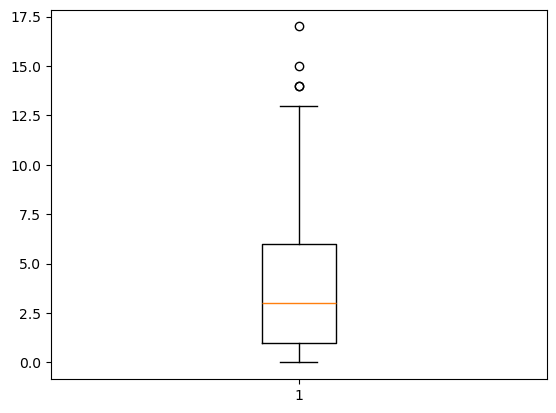

Glucose


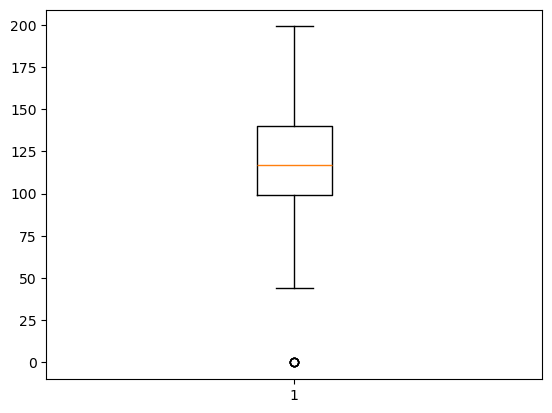

BloodPressure


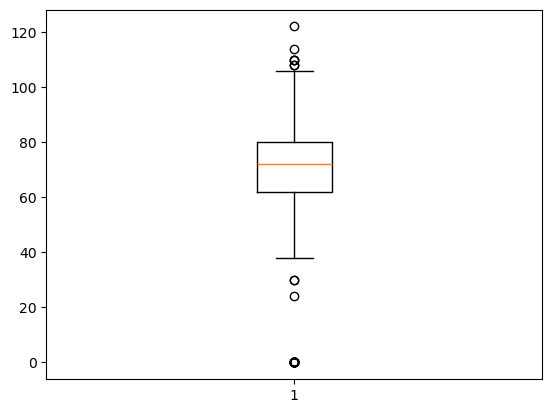

SkinThickness


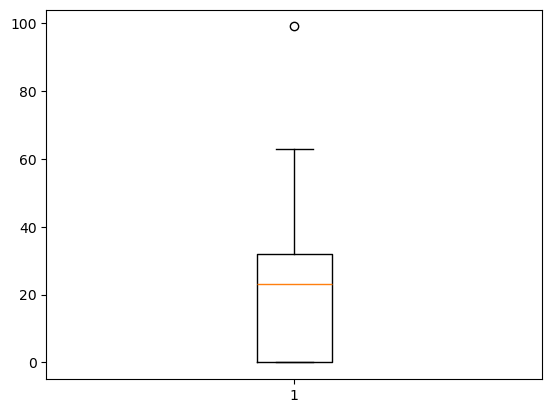

Insulin


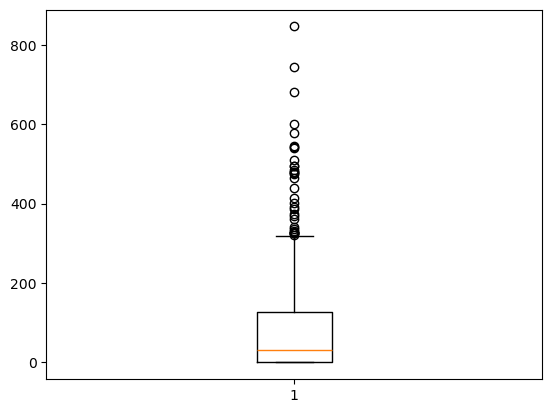

BMI


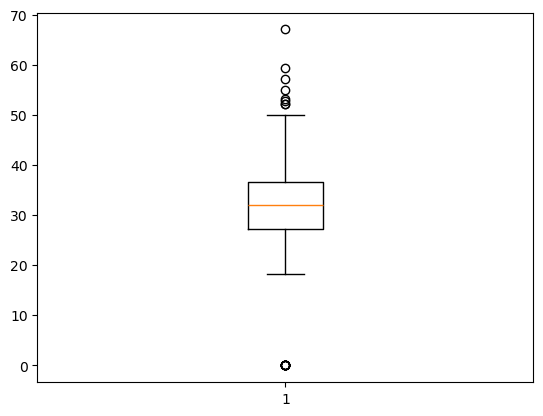

DiabetesPedigreeFunction


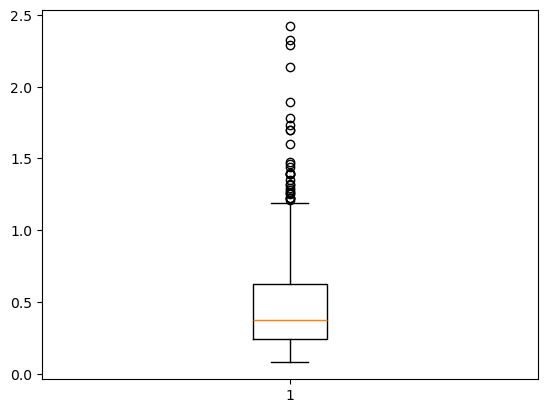

Age


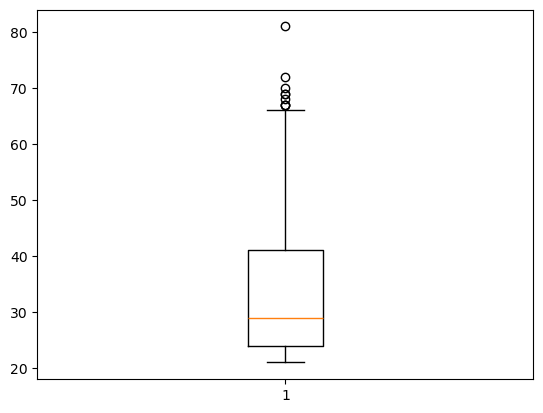

In [21]:
for i in X.columns.values:
    
    print(i)
    plt.boxplot(X[i])
    plt.show()

In [22]:
# pipeline
cont_pl= Pipeline(steps=[("robust_Scaler",RobustScaler())])

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [104]:
X["Age"].min()

21

In [28]:
rbs = ColumnTransformer(transformers=[
    ("robust_scaler", RobustScaler(), [0,1,2,3,4,5,6,7])
])

In [30]:
rbs

ColumnTransformer(transformers=[('robust_scaler', RobustScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7])])

In [32]:
#final pipeline
from sklearn.neighbors import KNeighborsClassifier


In [34]:
final_pl = Pipeline(steps=[("rbs",rbs),
                          ("estimator",KNeighborsClassifier())])

In [36]:
final_pl

Pipeline(steps=[('rbs',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('estimator', KNeighborsClassifier())])

In [38]:
# split the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23)

In [40]:
final_pl.fit(X_train,y_train)

Pipeline(steps=[('rbs',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('estimator', KNeighborsClassifier())])

In [42]:
y_pred = final_pl.predict(X_test)

In [44]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [46]:
accuracy_score(y_test,y_pred)

0.7864583333333334

In [50]:
# pickling the final_pl object
import pickle
with open("elite_31_Diabetes.pkl","wb") as f:
    pickle.dump(final_pl,f)

In [52]:
with open("elite_31_Diabetes.pkl","rb") as f :
    model = pickle.load(f)

In [60]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a DataFrame with your input values
input_data = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]], columns=column_names)

# Predict using the model
#print("Here Predicted Diabetes : ",model.predict(input_data)[0])
predictedValue = model.predict(input_data)[0]
predictedValue
if predictedValue == 1:
    print(f"Predicted Value is : {predictedValue} => So Patient has diabetes")
else:
    print(f"Predicted Value is : {predictedValue} => So Patient does not have diabetes")

    

Predicted Value is : 1 => So Patient has diabetes


<Axes: xlabel='Outcome', ylabel='count'>

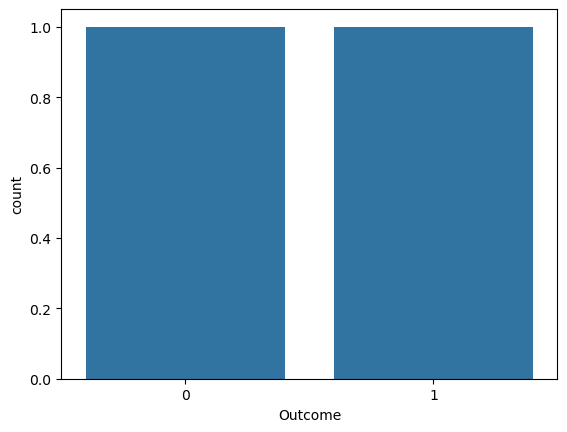

In [157]:
 sns.countplot(df["Outcome"].value_counts())

In [159]:
df['Outcome'].value_counts(normalize=True) * 100


Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64